In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
X, y = datasets.make_moons(noise=0.15, random_state=666)
X.shape

(100, 2)

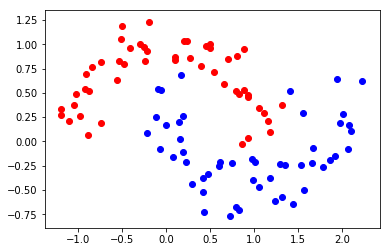

In [7]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

## 使用多项式特征的SVM

In [8]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('linearSVC', LinearSVC(C=C))
    ])

In [23]:
poly_svc = PolynomialSVC(degree=3, C=1)
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [10]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


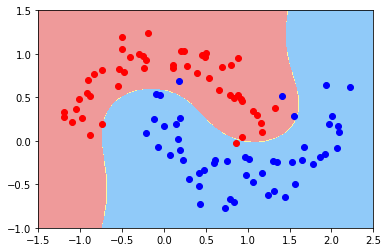

In [24]:
plot_decision_boundary(poly_svc, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

## 使用多项式和函数的SVM

In [20]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))  
        # 指定kernel为poly也能实现非线性拟合, 但是结果和上面的不一样
    ])

In [21]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


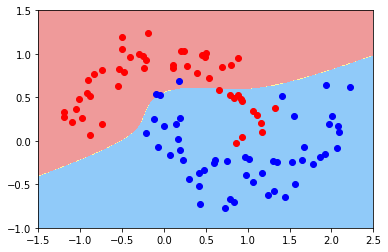

In [22]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

# 核函数

### $min\frac{1}{2}\|w\|^2 + C \sum_{i=1}^m\zeta_i$  , 核函数推导这里用不上正则化项,所以L1/L2无所谓
### $s.t.\ \ \ y^{(i)}(w^Tx^{(i)}+b) \geq 1-\zeta_i$
#### $\zeta_i \geq 0$

## 上面三式变成如下形式: 
### $max\sum_{i=1}^{m}\alpha_i - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_j y_i y_j x_i x_j$ , i代表行, j代表列
### $s.t.\ \ \ 0 \leq \alpha_i\leq C$
### $\sum_{i=1}^{m}\alpha_i y_i = 0$

### ===> $max\sum_{i=1}^{m}\alpha_i - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_j y_i y_j K(x_i,x_j)$ 

------
### $K(x,y) = (x \cdot y +1)^2 = (\sum_{i=1}^{n}x_i y_i + 1)^2$
#### $=\sum_{i=1}^{n}(x_i^2)(y_i^2)+\sum_{i=2}^{n}\sum_{j=1}^{i-1}(\sqrt2 x_i y_j)(\sqrt2 x_i y_j)
+\sum_{i=1}^{n}(\sqrt2 x_i)(\sqrt2 y_j) + 1$
### $=x' \cdot y'$
### $x' = (x_n^2, \ldots, x_1^2, \sqrt2 x_n x_{n-1}, \ldots, \sqrt2 x_n, \ldots, \sqrt2 x_1, 1)$

----
### **多项式核函数:** $K(x,y) = (x \cdot y + c)^d = (\sum_{i=1}^{n}x_i y_i + c)^d$ , d 和 c为超参数
#### sklearn.svm.SVC的参数里面, 如果kernel='poly'为多项式核函数, 
#### 在其基础上, 可以指定degree为上面的d, coef0为上面的c

----
### **线性核函数**: $K(x,y) = x \cdot y $

----
### **高斯核函数(RBF):** $K(x,y)=e^{-\gamma \|x-y\|^2}$ , $\gamma$是超参数
RBF Radial Basis Function Kernel

# 直观理解高斯核函数

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
x = np.arange(-4,5,1)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [29]:
y = np.array((x>=-2) & (x<=2),dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

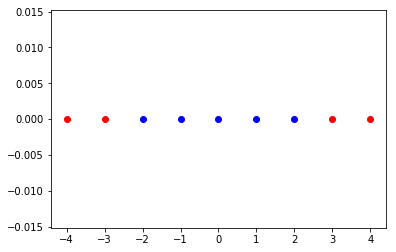

In [32]:
plt.scatter(x[y==0], [0]*len(x[y==0]), color='red')
plt.scatter(x[y==1], [0]*len(x[y==1]), color='blue')
plt.show()

In [34]:
def gaussian(x, land_mark):
    gamma = 1.0
    return np.exp(-gamma * (x-land_mark)**2)

In [35]:
land_mark1, land_mark2 = -1, 1
x_new = np.empty((len(x), 2))

for i, data in enumerate(x):
    x_new[i, 0] = gaussian(data, land_mark1)
    x_new[i, 1] = gaussian(data, land_mark2)

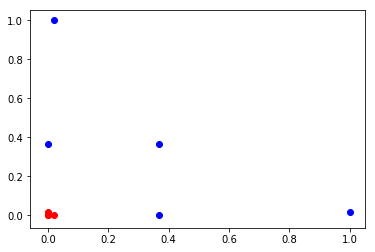

In [36]:
plt.scatter(x_new[y==0,0], x_new[y==0,1], color='red')
plt.scatter(x_new[y==1,0], x_new[y==1,1], color='blue')
plt.show()